In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import cv2
%matplotlib inline

In [2]:
TRAIN_DATA_PATH = "./Data2/train" 


IMAGE_SIZE = 50 #We'll be workign with 50 * 50 pixel images
NUM_OF_CHANNELS = 1 # Grayscale
NUM_OF_DENSE_LAYER_NODES = (IMAGE_SIZE * IMAGE_SIZE) // 2



NUM_OF_DENSE_LAYER_NODES

1250

In [3]:
#appending image of each type in list
y_unique = []
x_unique = []
print(TRAIN_DATA_PATH)
for word in os.listdir(TRAIN_DATA_PATH):
    
    for image in os.listdir(TRAIN_DATA_PATH+str('\\')+word):
        X=imread(TRAIN_DATA_PATH+str('\\')+word+str('\\')+image)
        x_unique.append(X)
        y_unique.append(word)
        break

./Data2/train


In [4]:
y_unique

['Bathroom',
 'Bed',
 'Cry',
 'Drink',
 'Food',
 'Give',
 'Hello',
 'Help',
 'House',
 'Hug',
 'I',
 'Love',
 'me',
 'Namaste',
 'Ok',
 'Shut up',
 'Smile',
 'Thank You',
 'You']

In [5]:
NUM_OF_WORDS=len(x_unique)
print(NUM_OF_WORDS)

19


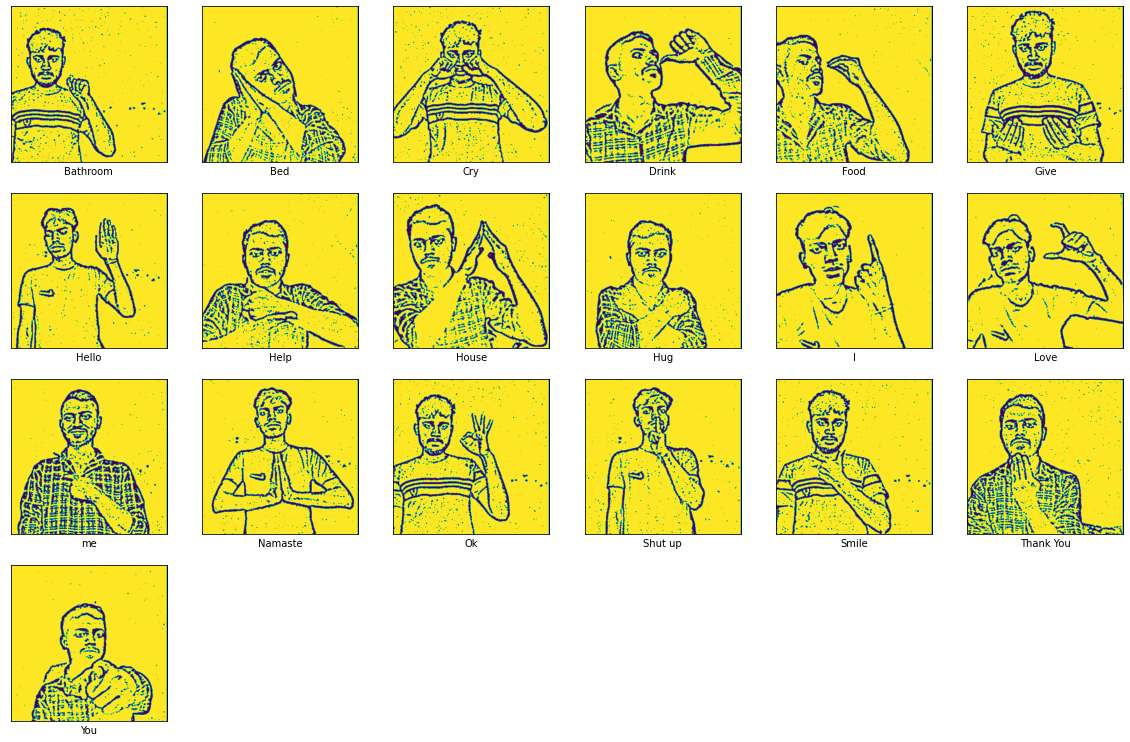

In [16]:
fig=plt.figure(figsize=(20,20))
for i in range(len(x_unique)):
    ax=fig.add_subplot(6,6,i+1)
    ax.imshow(x_unique[i])
    plt.xlabel(y_unique[i])
    plt.xticks([])
    plt.yticks([])
#plt.axis('off')
plt.show()
fig.savefig('word')

In [7]:
def create_data(DATA_PATH):
    x=[]
    y=[]
    LABELS=['Bathroom',
 'Bed',
 'Cry',
 'Drink',
 'Food',
 'Give',
 'Hello',
 'Help',
 'House',
 'Hug',
 'I',
 'Love',
 'me',
 'Namaste',
 'Ok',
 'Shut up',
 'Smile',
 'Thank You',
 'You']
    paths=[]
    for word in LABELS:
        path = os.path.join(DATA_PATH, word)
        label_name = LABELS.index(word)
        for img in os.listdir(path):
            p=os.path.join(path, img)
            paths.append(p)
            print(p)
            try:
                img_array = cv2.imread(p)#os.path.join(path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                img_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
                x.append(img_array)
                y.append(label_name)
            except Exception as e:
                pass
    return x,y

X_train, y_train= create_data(TRAIN_DATA_PATH)


./Data2/train\Bathroom\0.jpg
./Data2/train\Bathroom\1.jpg
./Data2/train\Bathroom\10.jpg
./Data2/train\Bathroom\100.jpg
./Data2/train\Bathroom\1000.jpg
./Data2/train\Bathroom\1001.jpg
./Data2/train\Bathroom\101.jpg
./Data2/train\Bathroom\102.jpg
./Data2/train\Bathroom\103.jpg
./Data2/train\Bathroom\104.jpg
./Data2/train\Bathroom\105.jpg
./Data2/train\Bathroom\106.jpg
./Data2/train\Bathroom\107.jpg
./Data2/train\Bathroom\108.jpg
./Data2/train\Bathroom\109.jpg
./Data2/train\Bathroom\11.jpg
./Data2/train\Bathroom\110.jpg
./Data2/train\Bathroom\111.jpg
./Data2/train\Bathroom\112.jpg
./Data2/train\Bathroom\113.jpg
./Data2/train\Bathroom\114.jpg
./Data2/train\Bathroom\115.jpg
./Data2/train\Bathroom\116.jpg
./Data2/train\Bathroom\117.jpg
./Data2/train\Bathroom\118.jpg
./Data2/train\Bathroom\119.jpg
./Data2/train\Bathroom\12.jpg
./Data2/train\Bathroom\120.jpg
./Data2/train\Bathroom\121.jpg
./Data2/train\Bathroom\122.jpg
./Data2/train\Bathroom\123.jpg
./Data2/train\Bathroom\124.jpg
./Data2/train

./Data2/train\Bathroom\337.jpg
./Data2/train\Bathroom\338.jpg
./Data2/train\Bathroom\339.jpg
./Data2/train\Bathroom\34.jpg
./Data2/train\Bathroom\340.jpg
./Data2/train\Bathroom\341.jpg
./Data2/train\Bathroom\342.jpg
./Data2/train\Bathroom\343.jpg
./Data2/train\Bathroom\344.jpg
./Data2/train\Bathroom\345.jpg
./Data2/train\Bathroom\346.jpg
./Data2/train\Bathroom\347.jpg
./Data2/train\Bathroom\348.jpg
./Data2/train\Bathroom\349.jpg
./Data2/train\Bathroom\35.jpg
./Data2/train\Bathroom\350.jpg
./Data2/train\Bathroom\351.jpg
./Data2/train\Bathroom\352.jpg
./Data2/train\Bathroom\353.jpg
./Data2/train\Bathroom\354.jpg
./Data2/train\Bathroom\355.jpg
./Data2/train\Bathroom\356.jpg
./Data2/train\Bathroom\357.jpg
./Data2/train\Bathroom\358.jpg
./Data2/train\Bathroom\359.jpg
./Data2/train\Bathroom\36.jpg
./Data2/train\Bathroom\360.jpg
./Data2/train\Bathroom\361.jpg
./Data2/train\Bathroom\362.jpg
./Data2/train\Bathroom\363.jpg
./Data2/train\Bathroom\364.jpg
./Data2/train\Bathroom\365.jpg
./Data2/tra

./Data2/train\Bathroom\617.jpg
./Data2/train\Bathroom\618.jpg
./Data2/train\Bathroom\619.jpg
./Data2/train\Bathroom\62.jpg
./Data2/train\Bathroom\620.jpg
./Data2/train\Bathroom\621.jpg
./Data2/train\Bathroom\622.jpg
./Data2/train\Bathroom\623.jpg
./Data2/train\Bathroom\624.jpg
./Data2/train\Bathroom\625.jpg
./Data2/train\Bathroom\626.jpg
./Data2/train\Bathroom\627.jpg
./Data2/train\Bathroom\628.jpg
./Data2/train\Bathroom\629.jpg
./Data2/train\Bathroom\63.jpg
./Data2/train\Bathroom\630.jpg
./Data2/train\Bathroom\631.jpg
./Data2/train\Bathroom\632.jpg
./Data2/train\Bathroom\633.jpg
./Data2/train\Bathroom\634.jpg
./Data2/train\Bathroom\635.jpg
./Data2/train\Bathroom\636.jpg
./Data2/train\Bathroom\637.jpg
./Data2/train\Bathroom\638.jpg
./Data2/train\Bathroom\639.jpg
./Data2/train\Bathroom\64.jpg
./Data2/train\Bathroom\640.jpg
./Data2/train\Bathroom\641.jpg
./Data2/train\Bathroom\642.jpg
./Data2/train\Bathroom\643.jpg
./Data2/train\Bathroom\644.jpg
./Data2/train\Bathroom\645.jpg
./Data2/tra

./Data2/train\Bathroom\884.jpg
./Data2/train\Bathroom\885.jpg
./Data2/train\Bathroom\886.jpg
./Data2/train\Bathroom\887.jpg
./Data2/train\Bathroom\888.jpg
./Data2/train\Bathroom\889.jpg
./Data2/train\Bathroom\89.jpg
./Data2/train\Bathroom\890.jpg
./Data2/train\Bathroom\891.jpg
./Data2/train\Bathroom\892.jpg
./Data2/train\Bathroom\893.jpg
./Data2/train\Bathroom\894.jpg
./Data2/train\Bathroom\895.jpg
./Data2/train\Bathroom\896.jpg
./Data2/train\Bathroom\897.jpg
./Data2/train\Bathroom\898.jpg
./Data2/train\Bathroom\899.jpg
./Data2/train\Bathroom\9.jpg
./Data2/train\Bathroom\90.jpg
./Data2/train\Bathroom\900.jpg
./Data2/train\Bathroom\901.jpg
./Data2/train\Bathroom\902.jpg
./Data2/train\Bathroom\903.jpg
./Data2/train\Bathroom\904.jpg
./Data2/train\Bathroom\905.jpg
./Data2/train\Bathroom\906.jpg
./Data2/train\Bathroom\907.jpg
./Data2/train\Bathroom\908.jpg
./Data2/train\Bathroom\909.jpg
./Data2/train\Bathroom\91.jpg
./Data2/train\Bathroom\910.jpg
./Data2/train\Bathroom\911.jpg
./Data2/train

./Data2/train\Bed\251.jpg
./Data2/train\Bed\252.jpg
./Data2/train\Bed\253.jpg
./Data2/train\Bed\254.jpg
./Data2/train\Bed\255.jpg
./Data2/train\Bed\256.jpg
./Data2/train\Bed\257.jpg
./Data2/train\Bed\258.jpg
./Data2/train\Bed\259.jpg
./Data2/train\Bed\26.jpg
./Data2/train\Bed\260.jpg
./Data2/train\Bed\261.jpg
./Data2/train\Bed\262.jpg
./Data2/train\Bed\263.jpg
./Data2/train\Bed\264.jpg
./Data2/train\Bed\265.jpg
./Data2/train\Bed\266.jpg
./Data2/train\Bed\267.jpg
./Data2/train\Bed\268.jpg
./Data2/train\Bed\269.jpg
./Data2/train\Bed\27.jpg
./Data2/train\Bed\270.jpg
./Data2/train\Bed\271.jpg
./Data2/train\Bed\272.jpg
./Data2/train\Bed\273.jpg
./Data2/train\Bed\274.jpg
./Data2/train\Bed\275.jpg
./Data2/train\Bed\276.jpg
./Data2/train\Bed\277.jpg
./Data2/train\Bed\278.jpg
./Data2/train\Bed\279.jpg
./Data2/train\Bed\28.jpg
./Data2/train\Bed\280.jpg
./Data2/train\Bed\281.jpg
./Data2/train\Bed\282.jpg
./Data2/train\Bed\283.jpg
./Data2/train\Bed\284.jpg
./Data2/train\Bed\285.jpg
./Data2/train\B

./Data2/train\Bed\579.jpg
./Data2/train\Bed\58.jpg
./Data2/train\Bed\580.jpg
./Data2/train\Bed\581.jpg
./Data2/train\Bed\582.jpg
./Data2/train\Bed\583.jpg
./Data2/train\Bed\584.jpg
./Data2/train\Bed\585.jpg
./Data2/train\Bed\586.jpg
./Data2/train\Bed\587.jpg
./Data2/train\Bed\588.jpg
./Data2/train\Bed\589.jpg
./Data2/train\Bed\59.jpg
./Data2/train\Bed\590.jpg
./Data2/train\Bed\591.jpg
./Data2/train\Bed\592.jpg
./Data2/train\Bed\593.jpg
./Data2/train\Bed\594.jpg
./Data2/train\Bed\595.jpg
./Data2/train\Bed\596.jpg
./Data2/train\Bed\597.jpg
./Data2/train\Bed\598.jpg
./Data2/train\Bed\599.jpg
./Data2/train\Bed\6.jpg
./Data2/train\Bed\60.jpg
./Data2/train\Bed\600.jpg
./Data2/train\Bed\601.jpg
./Data2/train\Bed\602.jpg
./Data2/train\Bed\603.jpg
./Data2/train\Bed\604.jpg
./Data2/train\Bed\605.jpg
./Data2/train\Bed\606.jpg
./Data2/train\Bed\607.jpg
./Data2/train\Bed\608.jpg
./Data2/train\Bed\609.jpg
./Data2/train\Bed\61.jpg
./Data2/train\Bed\610.jpg
./Data2/train\Bed\611.jpg
./Data2/train\Bed\

./Data2/train\Bed\880.jpg
./Data2/train\Bed\881.jpg
./Data2/train\Bed\882.jpg
./Data2/train\Bed\883.jpg
./Data2/train\Bed\884.jpg
./Data2/train\Bed\885.jpg
./Data2/train\Bed\886.jpg
./Data2/train\Bed\887.jpg
./Data2/train\Bed\888.jpg
./Data2/train\Bed\889.jpg
./Data2/train\Bed\89.jpg
./Data2/train\Bed\890.jpg
./Data2/train\Bed\891.jpg
./Data2/train\Bed\892.jpg
./Data2/train\Bed\893.jpg
./Data2/train\Bed\894.jpg
./Data2/train\Bed\895.jpg
./Data2/train\Bed\896.jpg
./Data2/train\Bed\897.jpg
./Data2/train\Bed\898.jpg
./Data2/train\Bed\899.jpg
./Data2/train\Bed\9.jpg
./Data2/train\Bed\90.jpg
./Data2/train\Bed\900.jpg
./Data2/train\Bed\901.jpg
./Data2/train\Bed\902.jpg
./Data2/train\Bed\903.jpg
./Data2/train\Bed\904.jpg
./Data2/train\Bed\905.jpg
./Data2/train\Bed\906.jpg
./Data2/train\Bed\907.jpg
./Data2/train\Bed\908.jpg
./Data2/train\Bed\909.jpg
./Data2/train\Bed\91.jpg
./Data2/train\Bed\910.jpg
./Data2/train\Bed\911.jpg
./Data2/train\Bed\912.jpg
./Data2/train\Bed\913.jpg
./Data2/train\Bed

./Data2/train\Cry\289.jpg
./Data2/train\Cry\29.jpg
./Data2/train\Cry\290.jpg
./Data2/train\Cry\291.jpg
./Data2/train\Cry\292.jpg
./Data2/train\Cry\293.jpg
./Data2/train\Cry\294.jpg
./Data2/train\Cry\295.jpg
./Data2/train\Cry\296.jpg
./Data2/train\Cry\297.jpg
./Data2/train\Cry\298.jpg
./Data2/train\Cry\299.jpg
./Data2/train\Cry\3.jpg
./Data2/train\Cry\30.jpg
./Data2/train\Cry\300.jpg
./Data2/train\Cry\301.jpg
./Data2/train\Cry\302.jpg
./Data2/train\Cry\303.jpg
./Data2/train\Cry\304.jpg
./Data2/train\Cry\305.jpg
./Data2/train\Cry\306.jpg
./Data2/train\Cry\307.jpg
./Data2/train\Cry\308.jpg
./Data2/train\Cry\309.jpg
./Data2/train\Cry\31.jpg
./Data2/train\Cry\310.jpg
./Data2/train\Cry\311.jpg
./Data2/train\Cry\312.jpg
./Data2/train\Cry\313.jpg
./Data2/train\Cry\314.jpg
./Data2/train\Cry\315.jpg
./Data2/train\Cry\316.jpg
./Data2/train\Cry\317.jpg
./Data2/train\Cry\318.jpg
./Data2/train\Cry\319.jpg
./Data2/train\Cry\32.jpg
./Data2/train\Cry\320.jpg
./Data2/train\Cry\321.jpg
./Data2/train\Cry\

./Data2/train\Cry\593.jpg
./Data2/train\Cry\594.jpg
./Data2/train\Cry\595.jpg
./Data2/train\Cry\596.jpg
./Data2/train\Cry\597.jpg
./Data2/train\Cry\598.jpg
./Data2/train\Cry\599.jpg
./Data2/train\Cry\6.jpg
./Data2/train\Cry\60.jpg
./Data2/train\Cry\600.jpg
./Data2/train\Cry\601.jpg
./Data2/train\Cry\602.jpg
./Data2/train\Cry\603.jpg
./Data2/train\Cry\604.jpg
./Data2/train\Cry\605.jpg
./Data2/train\Cry\606.jpg
./Data2/train\Cry\607.jpg
./Data2/train\Cry\608.jpg
./Data2/train\Cry\609.jpg
./Data2/train\Cry\61.jpg
./Data2/train\Cry\610.jpg
./Data2/train\Cry\611.jpg
./Data2/train\Cry\612.jpg
./Data2/train\Cry\613.jpg
./Data2/train\Cry\614.jpg
./Data2/train\Cry\615.jpg
./Data2/train\Cry\616.jpg
./Data2/train\Cry\617.jpg
./Data2/train\Cry\618.jpg
./Data2/train\Cry\619.jpg
./Data2/train\Cry\62.jpg
./Data2/train\Cry\620.jpg
./Data2/train\Cry\621.jpg
./Data2/train\Cry\622.jpg
./Data2/train\Cry\623.jpg
./Data2/train\Cry\624.jpg
./Data2/train\Cry\625.jpg
./Data2/train\Cry\626.jpg
./Data2/train\Cry

./Data2/train\Cry\902.jpg
./Data2/train\Cry\903.jpg
./Data2/train\Cry\904.jpg
./Data2/train\Cry\905.jpg
./Data2/train\Cry\906.jpg
./Data2/train\Cry\907.jpg
./Data2/train\Cry\908.jpg
./Data2/train\Cry\909.jpg
./Data2/train\Cry\91.jpg
./Data2/train\Cry\910.jpg
./Data2/train\Cry\911.jpg
./Data2/train\Cry\912.jpg
./Data2/train\Cry\913.jpg
./Data2/train\Cry\914.jpg
./Data2/train\Cry\915.jpg
./Data2/train\Cry\916.jpg
./Data2/train\Cry\917.jpg
./Data2/train\Cry\918.jpg
./Data2/train\Cry\919.jpg
./Data2/train\Cry\92.jpg
./Data2/train\Cry\920.jpg
./Data2/train\Cry\921.jpg
./Data2/train\Cry\922.jpg
./Data2/train\Cry\923.jpg
./Data2/train\Cry\924.jpg
./Data2/train\Cry\925.jpg
./Data2/train\Cry\926.jpg
./Data2/train\Cry\927.jpg
./Data2/train\Cry\928.jpg
./Data2/train\Cry\929.jpg
./Data2/train\Cry\93.jpg
./Data2/train\Cry\930.jpg
./Data2/train\Cry\931.jpg
./Data2/train\Cry\932.jpg
./Data2/train\Cry\933.jpg
./Data2/train\Cry\934.jpg
./Data2/train\Cry\935.jpg
./Data2/train\Cry\936.jpg
./Data2/train\C

./Data2/train\Drink\3.jpg
./Data2/train\Drink\30.jpg
./Data2/train\Drink\300.jpg
./Data2/train\Drink\301.jpg
./Data2/train\Drink\302.jpg
./Data2/train\Drink\303.jpg
./Data2/train\Drink\304.jpg
./Data2/train\Drink\305.jpg
./Data2/train\Drink\306.jpg
./Data2/train\Drink\307.jpg
./Data2/train\Drink\308.jpg
./Data2/train\Drink\309.jpg
./Data2/train\Drink\31.jpg
./Data2/train\Drink\310.jpg
./Data2/train\Drink\311.jpg
./Data2/train\Drink\312.jpg
./Data2/train\Drink\313.jpg
./Data2/train\Drink\314.jpg
./Data2/train\Drink\315.jpg
./Data2/train\Drink\316.jpg
./Data2/train\Drink\317.jpg
./Data2/train\Drink\318.jpg
./Data2/train\Drink\319.jpg
./Data2/train\Drink\32.jpg
./Data2/train\Drink\320.jpg
./Data2/train\Drink\321.jpg
./Data2/train\Drink\322.jpg
./Data2/train\Drink\323.jpg
./Data2/train\Drink\324.jpg
./Data2/train\Drink\325.jpg
./Data2/train\Drink\326.jpg
./Data2/train\Drink\327.jpg
./Data2/train\Drink\328.jpg
./Data2/train\Drink\329.jpg
./Data2/train\Drink\33.jpg
./Data2/train\Drink\330.jp

./Data2/train\Drink\585.jpg
./Data2/train\Drink\586.jpg
./Data2/train\Drink\587.jpg
./Data2/train\Drink\588.jpg
./Data2/train\Drink\589.jpg
./Data2/train\Drink\59.jpg
./Data2/train\Drink\590.jpg
./Data2/train\Drink\591.jpg
./Data2/train\Drink\592.jpg
./Data2/train\Drink\593.jpg
./Data2/train\Drink\594.jpg
./Data2/train\Drink\595.jpg
./Data2/train\Drink\596.jpg
./Data2/train\Drink\597.jpg
./Data2/train\Drink\598.jpg
./Data2/train\Drink\599.jpg
./Data2/train\Drink\6.jpg
./Data2/train\Drink\60.jpg
./Data2/train\Drink\600.jpg
./Data2/train\Drink\601.jpg
./Data2/train\Drink\602.jpg
./Data2/train\Drink\603.jpg
./Data2/train\Drink\604.jpg
./Data2/train\Drink\605.jpg
./Data2/train\Drink\606.jpg
./Data2/train\Drink\607.jpg
./Data2/train\Drink\608.jpg
./Data2/train\Drink\609.jpg
./Data2/train\Drink\61.jpg
./Data2/train\Drink\610.jpg
./Data2/train\Drink\611.jpg
./Data2/train\Drink\612.jpg
./Data2/train\Drink\613.jpg
./Data2/train\Drink\614.jpg
./Data2/train\Drink\615.jpg
./Data2/train\Drink\616.j

./Data2/train\Drink\855.jpg
./Data2/train\Drink\856.jpg
./Data2/train\Drink\857.jpg
./Data2/train\Drink\858.jpg
./Data2/train\Drink\859.jpg
./Data2/train\Drink\86.jpg
./Data2/train\Drink\860.jpg
./Data2/train\Drink\861.jpg
./Data2/train\Drink\862.jpg
./Data2/train\Drink\863.jpg
./Data2/train\Drink\864.jpg
./Data2/train\Drink\865.jpg
./Data2/train\Drink\866.jpg
./Data2/train\Drink\867.jpg
./Data2/train\Drink\868.jpg
./Data2/train\Drink\869.jpg
./Data2/train\Drink\87.jpg
./Data2/train\Drink\870.jpg
./Data2/train\Drink\871.jpg
./Data2/train\Drink\872.jpg
./Data2/train\Drink\873.jpg
./Data2/train\Drink\874.jpg
./Data2/train\Drink\875.jpg
./Data2/train\Drink\876.jpg
./Data2/train\Drink\877.jpg
./Data2/train\Drink\878.jpg
./Data2/train\Drink\879.jpg
./Data2/train\Drink\88.jpg
./Data2/train\Drink\880.jpg
./Data2/train\Drink\881.jpg
./Data2/train\Drink\882.jpg
./Data2/train\Drink\883.jpg
./Data2/train\Drink\884.jpg
./Data2/train\Drink\885.jpg
./Data2/train\Drink\886.jpg
./Data2/train\Drink\887

./Data2/train\Food\243.jpg
./Data2/train\Food\244.jpg
./Data2/train\Food\245.jpg
./Data2/train\Food\246.jpg
./Data2/train\Food\247.jpg
./Data2/train\Food\248.jpg
./Data2/train\Food\249.jpg
./Data2/train\Food\25.jpg
./Data2/train\Food\250.jpg
./Data2/train\Food\251.jpg
./Data2/train\Food\252.jpg
./Data2/train\Food\253.jpg
./Data2/train\Food\254.jpg
./Data2/train\Food\255.jpg
./Data2/train\Food\256.jpg
./Data2/train\Food\257.jpg
./Data2/train\Food\258.jpg
./Data2/train\Food\259.jpg
./Data2/train\Food\26.jpg
./Data2/train\Food\260.jpg
./Data2/train\Food\261.jpg
./Data2/train\Food\262.jpg
./Data2/train\Food\263.jpg
./Data2/train\Food\264.jpg
./Data2/train\Food\265.jpg
./Data2/train\Food\266.jpg
./Data2/train\Food\267.jpg
./Data2/train\Food\268.jpg
./Data2/train\Food\269.jpg
./Data2/train\Food\27.jpg
./Data2/train\Food\270.jpg
./Data2/train\Food\271.jpg
./Data2/train\Food\272.jpg
./Data2/train\Food\273.jpg
./Data2/train\Food\274.jpg
./Data2/train\Food\275.jpg
./Data2/train\Food\276.jpg
./Da

./Data2/train\Food\539.jpg
./Data2/train\Food\54.jpg
./Data2/train\Food\540.jpg
./Data2/train\Food\541.jpg
./Data2/train\Food\542.jpg
./Data2/train\Food\543.jpg
./Data2/train\Food\544.jpg
./Data2/train\Food\545.jpg
./Data2/train\Food\546.jpg
./Data2/train\Food\547.jpg
./Data2/train\Food\548.jpg
./Data2/train\Food\549.jpg
./Data2/train\Food\55.jpg
./Data2/train\Food\550.jpg
./Data2/train\Food\551.jpg
./Data2/train\Food\552.jpg
./Data2/train\Food\553.jpg
./Data2/train\Food\554.jpg
./Data2/train\Food\555.jpg
./Data2/train\Food\556.jpg
./Data2/train\Food\557.jpg
./Data2/train\Food\558.jpg
./Data2/train\Food\559.jpg
./Data2/train\Food\56.jpg
./Data2/train\Food\560.jpg
./Data2/train\Food\561.jpg
./Data2/train\Food\562.jpg
./Data2/train\Food\563.jpg
./Data2/train\Food\564.jpg
./Data2/train\Food\565.jpg
./Data2/train\Food\566.jpg
./Data2/train\Food\567.jpg
./Data2/train\Food\568.jpg
./Data2/train\Food\569.jpg
./Data2/train\Food\57.jpg
./Data2/train\Food\570.jpg
./Data2/train\Food\571.jpg
./Dat

./Data2/train\Food\817.jpg
./Data2/train\Food\818.jpg
./Data2/train\Food\819.jpg
./Data2/train\Food\82.jpg
./Data2/train\Food\820.jpg
./Data2/train\Food\821.jpg
./Data2/train\Food\822.jpg
./Data2/train\Food\823.jpg
./Data2/train\Food\824.jpg
./Data2/train\Food\825.jpg
./Data2/train\Food\826.jpg
./Data2/train\Food\827.jpg
./Data2/train\Food\828.jpg
./Data2/train\Food\829.jpg
./Data2/train\Food\83.jpg
./Data2/train\Food\830.jpg
./Data2/train\Food\831.jpg
./Data2/train\Food\832.jpg
./Data2/train\Food\833.jpg
./Data2/train\Food\834.jpg
./Data2/train\Food\835.jpg
./Data2/train\Food\836.jpg
./Data2/train\Food\837.jpg
./Data2/train\Food\838.jpg
./Data2/train\Food\839.jpg
./Data2/train\Food\84.jpg
./Data2/train\Food\840.jpg
./Data2/train\Food\841.jpg
./Data2/train\Food\842.jpg
./Data2/train\Food\843.jpg
./Data2/train\Food\844.jpg
./Data2/train\Food\845.jpg
./Data2/train\Food\846.jpg
./Data2/train\Food\847.jpg
./Data2/train\Food\848.jpg
./Data2/train\Food\849.jpg
./Data2/train\Food\85.jpg
./Dat

./Data2/train\Give\208.jpg
./Data2/train\Give\209.jpg
./Data2/train\Give\21.jpg
./Data2/train\Give\210.jpg
./Data2/train\Give\211.jpg
./Data2/train\Give\212.jpg
./Data2/train\Give\213.jpg
./Data2/train\Give\214.jpg
./Data2/train\Give\215.jpg
./Data2/train\Give\216.jpg
./Data2/train\Give\217.jpg
./Data2/train\Give\218.jpg
./Data2/train\Give\219.jpg
./Data2/train\Give\22.jpg
./Data2/train\Give\220.jpg
./Data2/train\Give\221.jpg
./Data2/train\Give\222.jpg
./Data2/train\Give\223.jpg
./Data2/train\Give\224.jpg
./Data2/train\Give\225.jpg
./Data2/train\Give\226.jpg
./Data2/train\Give\227.jpg
./Data2/train\Give\228.jpg
./Data2/train\Give\229.jpg
./Data2/train\Give\23.jpg
./Data2/train\Give\230.jpg
./Data2/train\Give\231.jpg
./Data2/train\Give\232.jpg
./Data2/train\Give\233.jpg
./Data2/train\Give\234.jpg
./Data2/train\Give\235.jpg
./Data2/train\Give\236.jpg
./Data2/train\Give\237.jpg
./Data2/train\Give\238.jpg
./Data2/train\Give\239.jpg
./Data2/train\Give\24.jpg
./Data2/train\Give\240.jpg
./Dat

./Data2/train\Give\525.jpg
./Data2/train\Give\526.jpg
./Data2/train\Give\527.jpg
./Data2/train\Give\528.jpg
./Data2/train\Give\529.jpg
./Data2/train\Give\53.jpg
./Data2/train\Give\530.jpg
./Data2/train\Give\531.jpg
./Data2/train\Give\532.jpg
./Data2/train\Give\533.jpg
./Data2/train\Give\534.jpg
./Data2/train\Give\535.jpg
./Data2/train\Give\536.jpg
./Data2/train\Give\537.jpg
./Data2/train\Give\538.jpg
./Data2/train\Give\539.jpg
./Data2/train\Give\54.jpg
./Data2/train\Give\540.jpg
./Data2/train\Give\541.jpg
./Data2/train\Give\542.jpg
./Data2/train\Give\543.jpg
./Data2/train\Give\544.jpg
./Data2/train\Give\545.jpg
./Data2/train\Give\546.jpg
./Data2/train\Give\547.jpg
./Data2/train\Give\548.jpg
./Data2/train\Give\549.jpg
./Data2/train\Give\55.jpg
./Data2/train\Give\550.jpg
./Data2/train\Give\551.jpg
./Data2/train\Give\552.jpg
./Data2/train\Give\553.jpg
./Data2/train\Give\554.jpg
./Data2/train\Give\555.jpg
./Data2/train\Give\556.jpg
./Data2/train\Give\557.jpg
./Data2/train\Give\558.jpg
./Da

./Data2/train\Give\837.jpg
./Data2/train\Give\838.jpg
./Data2/train\Give\839.jpg
./Data2/train\Give\84.jpg
./Data2/train\Give\840.jpg
./Data2/train\Give\841.jpg
./Data2/train\Give\842.jpg
./Data2/train\Give\843.jpg
./Data2/train\Give\844.jpg
./Data2/train\Give\845.jpg
./Data2/train\Give\846.jpg
./Data2/train\Give\847.jpg
./Data2/train\Give\848.jpg
./Data2/train\Give\849.jpg
./Data2/train\Give\85.jpg
./Data2/train\Give\850.jpg
./Data2/train\Give\851.jpg
./Data2/train\Give\852.jpg
./Data2/train\Give\853.jpg
./Data2/train\Give\854.jpg
./Data2/train\Give\855.jpg
./Data2/train\Give\856.jpg
./Data2/train\Give\857.jpg
./Data2/train\Give\858.jpg
./Data2/train\Give\859.jpg
./Data2/train\Give\86.jpg
./Data2/train\Give\860.jpg
./Data2/train\Give\861.jpg
./Data2/train\Give\862.jpg
./Data2/train\Give\863.jpg
./Data2/train\Give\864.jpg
./Data2/train\Give\865.jpg
./Data2/train\Give\866.jpg
./Data2/train\Give\867.jpg
./Data2/train\Give\868.jpg
./Data2/train\Give\869.jpg
./Data2/train\Give\87.jpg
./Dat

./Data2/train\Hello\224.jpg
./Data2/train\Hello\225.jpg
./Data2/train\Hello\226.jpg
./Data2/train\Hello\227.jpg
./Data2/train\Hello\228.jpg
./Data2/train\Hello\229.jpg
./Data2/train\Hello\23.jpg
./Data2/train\Hello\230.jpg
./Data2/train\Hello\231.jpg
./Data2/train\Hello\232.jpg
./Data2/train\Hello\233.jpg
./Data2/train\Hello\234.jpg
./Data2/train\Hello\235.jpg
./Data2/train\Hello\236.jpg
./Data2/train\Hello\237.jpg
./Data2/train\Hello\238.jpg
./Data2/train\Hello\239.jpg
./Data2/train\Hello\24.jpg
./Data2/train\Hello\240.jpg
./Data2/train\Hello\241.jpg
./Data2/train\Hello\242.jpg
./Data2/train\Hello\243.jpg
./Data2/train\Hello\244.jpg
./Data2/train\Hello\245.jpg
./Data2/train\Hello\246.jpg
./Data2/train\Hello\247.jpg
./Data2/train\Hello\248.jpg
./Data2/train\Hello\249.jpg
./Data2/train\Hello\25.jpg
./Data2/train\Hello\250.jpg
./Data2/train\Hello\251.jpg
./Data2/train\Hello\252.jpg
./Data2/train\Hello\253.jpg
./Data2/train\Hello\254.jpg
./Data2/train\Hello\255.jpg
./Data2/train\Hello\256

./Data2/train\Hello\499.jpg
./Data2/train\Hello\5.jpg
./Data2/train\Hello\50.jpg
./Data2/train\Hello\500.jpg
./Data2/train\Hello\501.jpg
./Data2/train\Hello\502.jpg
./Data2/train\Hello\503.jpg
./Data2/train\Hello\504.jpg
./Data2/train\Hello\505.jpg
./Data2/train\Hello\506.jpg
./Data2/train\Hello\507.jpg
./Data2/train\Hello\508.jpg
./Data2/train\Hello\509.jpg
./Data2/train\Hello\51.jpg
./Data2/train\Hello\510.jpg
./Data2/train\Hello\511.jpg
./Data2/train\Hello\512.jpg
./Data2/train\Hello\513.jpg
./Data2/train\Hello\514.jpg
./Data2/train\Hello\515.jpg
./Data2/train\Hello\516.jpg
./Data2/train\Hello\517.jpg
./Data2/train\Hello\518.jpg
./Data2/train\Hello\519.jpg
./Data2/train\Hello\52.jpg
./Data2/train\Hello\520.jpg
./Data2/train\Hello\521.jpg
./Data2/train\Hello\522.jpg
./Data2/train\Hello\523.jpg
./Data2/train\Hello\524.jpg
./Data2/train\Hello\525.jpg
./Data2/train\Hello\526.jpg
./Data2/train\Hello\527.jpg
./Data2/train\Hello\528.jpg
./Data2/train\Hello\529.jpg
./Data2/train\Hello\53.jp

./Data2/train\Hello\766.jpg
./Data2/train\Hello\767.jpg
./Data2/train\Hello\768.jpg
./Data2/train\Hello\769.jpg
./Data2/train\Hello\77.jpg
./Data2/train\Hello\770.jpg
./Data2/train\Hello\771.jpg
./Data2/train\Hello\772.jpg
./Data2/train\Hello\773.jpg
./Data2/train\Hello\774.jpg
./Data2/train\Hello\775.jpg
./Data2/train\Hello\776.jpg
./Data2/train\Hello\777.jpg
./Data2/train\Hello\778.jpg
./Data2/train\Hello\779.jpg
./Data2/train\Hello\78.jpg
./Data2/train\Hello\780.jpg
./Data2/train\Hello\781.jpg
./Data2/train\Hello\782.jpg
./Data2/train\Hello\783.jpg
./Data2/train\Hello\784.jpg
./Data2/train\Hello\785.jpg
./Data2/train\Hello\786.jpg
./Data2/train\Hello\787.jpg
./Data2/train\Hello\788.jpg
./Data2/train\Hello\789.jpg
./Data2/train\Hello\79.jpg
./Data2/train\Hello\790.jpg
./Data2/train\Hello\791.jpg
./Data2/train\Hello\792.jpg
./Data2/train\Hello\793.jpg
./Data2/train\Hello\794.jpg
./Data2/train\Hello\795.jpg
./Data2/train\Hello\796.jpg
./Data2/train\Hello\797.jpg
./Data2/train\Hello\798

./Data2/train\Help\136.jpg
./Data2/train\Help\137.jpg
./Data2/train\Help\138.jpg
./Data2/train\Help\139.jpg
./Data2/train\Help\14.jpg
./Data2/train\Help\140.jpg
./Data2/train\Help\141.jpg
./Data2/train\Help\142.jpg
./Data2/train\Help\143.jpg
./Data2/train\Help\144.jpg
./Data2/train\Help\145.jpg
./Data2/train\Help\146.jpg
./Data2/train\Help\147.jpg
./Data2/train\Help\148.jpg
./Data2/train\Help\149.jpg
./Data2/train\Help\15.jpg
./Data2/train\Help\150.jpg
./Data2/train\Help\151.jpg
./Data2/train\Help\152.jpg
./Data2/train\Help\153.jpg
./Data2/train\Help\154.jpg
./Data2/train\Help\155.jpg
./Data2/train\Help\156.jpg
./Data2/train\Help\157.jpg
./Data2/train\Help\158.jpg
./Data2/train\Help\159.jpg
./Data2/train\Help\16.jpg
./Data2/train\Help\160.jpg
./Data2/train\Help\161.jpg
./Data2/train\Help\162.jpg
./Data2/train\Help\163.jpg
./Data2/train\Help\164.jpg
./Data2/train\Help\165.jpg
./Data2/train\Help\166.jpg
./Data2/train\Help\167.jpg
./Data2/train\Help\168.jpg
./Data2/train\Help\169.jpg
./Da

./Data2/train\Help\442.jpg
./Data2/train\Help\443.jpg
./Data2/train\Help\444.jpg
./Data2/train\Help\445.jpg
./Data2/train\Help\446.jpg
./Data2/train\Help\447.jpg
./Data2/train\Help\448.jpg
./Data2/train\Help\449.jpg
./Data2/train\Help\45.jpg
./Data2/train\Help\450.jpg
./Data2/train\Help\451.jpg
./Data2/train\Help\452.jpg
./Data2/train\Help\453.jpg
./Data2/train\Help\454.jpg
./Data2/train\Help\455.jpg
./Data2/train\Help\456.jpg
./Data2/train\Help\457.jpg
./Data2/train\Help\458.jpg
./Data2/train\Help\459.jpg
./Data2/train\Help\46.jpg
./Data2/train\Help\460.jpg
./Data2/train\Help\461.jpg
./Data2/train\Help\462.jpg
./Data2/train\Help\463.jpg
./Data2/train\Help\464.jpg
./Data2/train\Help\465.jpg
./Data2/train\Help\466.jpg
./Data2/train\Help\467.jpg
./Data2/train\Help\468.jpg
./Data2/train\Help\469.jpg
./Data2/train\Help\47.jpg
./Data2/train\Help\470.jpg
./Data2/train\Help\471.jpg
./Data2/train\Help\472.jpg
./Data2/train\Help\473.jpg
./Data2/train\Help\474.jpg
./Data2/train\Help\475.jpg
./Da

./Data2/train\Help\76.jpg
./Data2/train\Help\760.jpg
./Data2/train\Help\761.jpg
./Data2/train\Help\762.jpg
./Data2/train\Help\763.jpg
./Data2/train\Help\764.jpg
./Data2/train\Help\765.jpg
./Data2/train\Help\766.jpg
./Data2/train\Help\767.jpg
./Data2/train\Help\768.jpg
./Data2/train\Help\769.jpg
./Data2/train\Help\77.jpg
./Data2/train\Help\770.jpg
./Data2/train\Help\771.jpg
./Data2/train\Help\772.jpg
./Data2/train\Help\773.jpg
./Data2/train\Help\774.jpg
./Data2/train\Help\775.jpg
./Data2/train\Help\776.jpg
./Data2/train\Help\777.jpg
./Data2/train\Help\778.jpg
./Data2/train\Help\779.jpg
./Data2/train\Help\78.jpg
./Data2/train\Help\780.jpg
./Data2/train\Help\781.jpg
./Data2/train\Help\782.jpg
./Data2/train\Help\783.jpg
./Data2/train\Help\784.jpg
./Data2/train\Help\785.jpg
./Data2/train\Help\786.jpg
./Data2/train\Help\787.jpg
./Data2/train\Help\788.jpg
./Data2/train\Help\789.jpg
./Data2/train\Help\79.jpg
./Data2/train\Help\790.jpg
./Data2/train\Help\791.jpg
./Data2/train\Help\792.jpg
./Dat

./Data2/train\House\167.jpg
./Data2/train\House\168.jpg
./Data2/train\House\169.jpg
./Data2/train\House\17.jpg
./Data2/train\House\170.jpg
./Data2/train\House\171.jpg
./Data2/train\House\172.jpg
./Data2/train\House\173.jpg
./Data2/train\House\174.jpg
./Data2/train\House\175.jpg
./Data2/train\House\176.jpg
./Data2/train\House\177.jpg
./Data2/train\House\178.jpg
./Data2/train\House\179.jpg
./Data2/train\House\18.jpg
./Data2/train\House\180.jpg
./Data2/train\House\181.jpg
./Data2/train\House\182.jpg
./Data2/train\House\183.jpg
./Data2/train\House\184.jpg
./Data2/train\House\185.jpg
./Data2/train\House\186.jpg
./Data2/train\House\187.jpg
./Data2/train\House\188.jpg
./Data2/train\House\189.jpg
./Data2/train\House\19.jpg
./Data2/train\House\190.jpg
./Data2/train\House\191.jpg
./Data2/train\House\192.jpg
./Data2/train\House\193.jpg
./Data2/train\House\194.jpg
./Data2/train\House\195.jpg
./Data2/train\House\196.jpg
./Data2/train\House\197.jpg
./Data2/train\House\198.jpg
./Data2/train\House\199

./Data2/train\House\473.jpg
./Data2/train\House\474.jpg
./Data2/train\House\475.jpg
./Data2/train\House\476.jpg
./Data2/train\House\477.jpg
./Data2/train\House\478.jpg
./Data2/train\House\479.jpg
./Data2/train\House\48.jpg
./Data2/train\House\480.jpg
./Data2/train\House\481.jpg
./Data2/train\House\482.jpg
./Data2/train\House\483.jpg
./Data2/train\House\484.jpg
./Data2/train\House\485.jpg
./Data2/train\House\486.jpg
./Data2/train\House\487.jpg
./Data2/train\House\488.jpg
./Data2/train\House\489.jpg
./Data2/train\House\49.jpg
./Data2/train\House\490.jpg
./Data2/train\House\491.jpg
./Data2/train\House\492.jpg
./Data2/train\House\493.jpg
./Data2/train\House\494.jpg
./Data2/train\House\495.jpg
./Data2/train\House\496.jpg
./Data2/train\House\497.jpg
./Data2/train\House\498.jpg
./Data2/train\House\499.jpg
./Data2/train\House\5.jpg
./Data2/train\House\50.jpg
./Data2/train\House\500.jpg
./Data2/train\House\501.jpg
./Data2/train\House\502.jpg
./Data2/train\House\503.jpg
./Data2/train\House\504.j

./Data2/train\House\741.jpg
./Data2/train\House\742.jpg
./Data2/train\House\743.jpg
./Data2/train\House\744.jpg
./Data2/train\House\745.jpg
./Data2/train\House\746.jpg
./Data2/train\House\747.jpg
./Data2/train\House\748.jpg
./Data2/train\House\749.jpg
./Data2/train\House\75.jpg
./Data2/train\House\750.jpg
./Data2/train\House\751.jpg
./Data2/train\House\752.jpg
./Data2/train\House\753.jpg
./Data2/train\House\754.jpg
./Data2/train\House\755.jpg
./Data2/train\House\756.jpg
./Data2/train\House\757.jpg
./Data2/train\House\758.jpg
./Data2/train\House\759.jpg
./Data2/train\House\76.jpg
./Data2/train\House\760.jpg
./Data2/train\House\761.jpg
./Data2/train\House\762.jpg
./Data2/train\House\763.jpg
./Data2/train\House\764.jpg
./Data2/train\House\765.jpg
./Data2/train\House\766.jpg
./Data2/train\House\767.jpg
./Data2/train\House\768.jpg
./Data2/train\House\769.jpg
./Data2/train\House\77.jpg
./Data2/train\House\770.jpg
./Data2/train\House\771.jpg
./Data2/train\House\772.jpg
./Data2/train\House\773

./Data2/train\Hug\125.jpg
./Data2/train\Hug\126.jpg
./Data2/train\Hug\127.jpg
./Data2/train\Hug\128.jpg
./Data2/train\Hug\129.jpg
./Data2/train\Hug\13.jpg
./Data2/train\Hug\130.jpg
./Data2/train\Hug\131.jpg
./Data2/train\Hug\132.jpg
./Data2/train\Hug\133.jpg
./Data2/train\Hug\134.jpg
./Data2/train\Hug\135.jpg
./Data2/train\Hug\136.jpg
./Data2/train\Hug\137.jpg
./Data2/train\Hug\138.jpg
./Data2/train\Hug\139.jpg
./Data2/train\Hug\14.jpg
./Data2/train\Hug\140.jpg
./Data2/train\Hug\141.jpg
./Data2/train\Hug\142.jpg
./Data2/train\Hug\143.jpg
./Data2/train\Hug\144.jpg
./Data2/train\Hug\145.jpg
./Data2/train\Hug\146.jpg
./Data2/train\Hug\147.jpg
./Data2/train\Hug\148.jpg
./Data2/train\Hug\149.jpg
./Data2/train\Hug\15.jpg
./Data2/train\Hug\150.jpg
./Data2/train\Hug\151.jpg
./Data2/train\Hug\152.jpg
./Data2/train\Hug\153.jpg
./Data2/train\Hug\154.jpg
./Data2/train\Hug\155.jpg
./Data2/train\Hug\156.jpg
./Data2/train\Hug\157.jpg
./Data2/train\Hug\158.jpg
./Data2/train\Hug\159.jpg
./Data2/train\H

./Data2/train\Hug\424.jpg
./Data2/train\Hug\425.jpg
./Data2/train\Hug\426.jpg
./Data2/train\Hug\427.jpg
./Data2/train\Hug\428.jpg
./Data2/train\Hug\429.jpg
./Data2/train\Hug\43.jpg
./Data2/train\Hug\430.jpg
./Data2/train\Hug\431.jpg
./Data2/train\Hug\432.jpg
./Data2/train\Hug\433.jpg
./Data2/train\Hug\434.jpg
./Data2/train\Hug\435.jpg
./Data2/train\Hug\436.jpg
./Data2/train\Hug\437.jpg
./Data2/train\Hug\438.jpg
./Data2/train\Hug\439.jpg
./Data2/train\Hug\44.jpg
./Data2/train\Hug\440.jpg
./Data2/train\Hug\441.jpg
./Data2/train\Hug\442.jpg
./Data2/train\Hug\443.jpg
./Data2/train\Hug\444.jpg
./Data2/train\Hug\445.jpg
./Data2/train\Hug\446.jpg
./Data2/train\Hug\447.jpg
./Data2/train\Hug\448.jpg
./Data2/train\Hug\449.jpg
./Data2/train\Hug\45.jpg
./Data2/train\Hug\450.jpg
./Data2/train\Hug\451.jpg
./Data2/train\Hug\452.jpg
./Data2/train\Hug\453.jpg
./Data2/train\Hug\454.jpg
./Data2/train\Hug\455.jpg
./Data2/train\Hug\456.jpg
./Data2/train\Hug\457.jpg
./Data2/train\Hug\458.jpg
./Data2/train\H

./Data2/train\Hug\756.jpg
./Data2/train\Hug\757.jpg
./Data2/train\Hug\758.jpg
./Data2/train\Hug\759.jpg
./Data2/train\Hug\76.jpg
./Data2/train\Hug\760.jpg
./Data2/train\Hug\761.jpg
./Data2/train\Hug\762.jpg
./Data2/train\Hug\763.jpg
./Data2/train\Hug\764.jpg
./Data2/train\Hug\765.jpg
./Data2/train\Hug\766.jpg
./Data2/train\Hug\767.jpg
./Data2/train\Hug\768.jpg
./Data2/train\Hug\769.jpg
./Data2/train\Hug\77.jpg
./Data2/train\Hug\770.jpg
./Data2/train\Hug\771.jpg
./Data2/train\Hug\772.jpg
./Data2/train\Hug\773.jpg
./Data2/train\Hug\774.jpg
./Data2/train\Hug\775.jpg
./Data2/train\Hug\776.jpg
./Data2/train\Hug\777.jpg
./Data2/train\Hug\778.jpg
./Data2/train\Hug\779.jpg
./Data2/train\Hug\78.jpg
./Data2/train\Hug\780.jpg
./Data2/train\Hug\781.jpg
./Data2/train\Hug\782.jpg
./Data2/train\Hug\783.jpg
./Data2/train\Hug\784.jpg
./Data2/train\Hug\785.jpg
./Data2/train\Hug\786.jpg
./Data2/train\Hug\787.jpg
./Data2/train\Hug\788.jpg
./Data2/train\Hug\789.jpg
./Data2/train\Hug\79.jpg
./Data2/train\Hu

./Data2/train\I\153.jpg
./Data2/train\I\154.jpg
./Data2/train\I\155.jpg
./Data2/train\I\156.jpg
./Data2/train\I\157.jpg
./Data2/train\I\158.jpg
./Data2/train\I\159.jpg
./Data2/train\I\16.jpg
./Data2/train\I\160.jpg
./Data2/train\I\161.jpg
./Data2/train\I\162.jpg
./Data2/train\I\163.jpg
./Data2/train\I\164.jpg
./Data2/train\I\165.jpg
./Data2/train\I\166.jpg
./Data2/train\I\167.jpg
./Data2/train\I\168.jpg
./Data2/train\I\169.jpg
./Data2/train\I\17.jpg
./Data2/train\I\170.jpg
./Data2/train\I\171.jpg
./Data2/train\I\172.jpg
./Data2/train\I\173.jpg
./Data2/train\I\174.jpg
./Data2/train\I\175.jpg
./Data2/train\I\176.jpg
./Data2/train\I\177.jpg
./Data2/train\I\178.jpg
./Data2/train\I\179.jpg
./Data2/train\I\18.jpg
./Data2/train\I\180.jpg
./Data2/train\I\181.jpg
./Data2/train\I\182.jpg
./Data2/train\I\183.jpg
./Data2/train\I\184.jpg
./Data2/train\I\185.jpg
./Data2/train\I\186.jpg
./Data2/train\I\187.jpg
./Data2/train\I\188.jpg
./Data2/train\I\189.jpg
./Data2/train\I\19.jpg
./Data2/train\I\190.

./Data2/train\I\471.jpg
./Data2/train\I\472.jpg
./Data2/train\I\473.jpg
./Data2/train\I\474.jpg
./Data2/train\I\475.jpg
./Data2/train\I\476.jpg
./Data2/train\I\477.jpg
./Data2/train\I\478.jpg
./Data2/train\I\479.jpg
./Data2/train\I\48.jpg
./Data2/train\I\480.jpg
./Data2/train\I\481.jpg
./Data2/train\I\482.jpg
./Data2/train\I\483.jpg
./Data2/train\I\484.jpg
./Data2/train\I\485.jpg
./Data2/train\I\486.jpg
./Data2/train\I\487.jpg
./Data2/train\I\488.jpg
./Data2/train\I\489.jpg
./Data2/train\I\49.jpg
./Data2/train\I\490.jpg
./Data2/train\I\491.jpg
./Data2/train\I\492.jpg
./Data2/train\I\493.jpg
./Data2/train\I\494.jpg
./Data2/train\I\495.jpg
./Data2/train\I\496.jpg
./Data2/train\I\497.jpg
./Data2/train\I\498.jpg
./Data2/train\I\499.jpg
./Data2/train\I\5.jpg
./Data2/train\I\50.jpg
./Data2/train\I\500.jpg
./Data2/train\I\501.jpg
./Data2/train\I\502.jpg
./Data2/train\I\503.jpg
./Data2/train\I\504.jpg
./Data2/train\I\505.jpg
./Data2/train\I\506.jpg
./Data2/train\I\507.jpg
./Data2/train\I\508.j

./Data2/train\Love\290.jpg
./Data2/train\Love\291.jpg
./Data2/train\Love\292.jpg
./Data2/train\Love\293.jpg
./Data2/train\Love\294.jpg
./Data2/train\Love\295.jpg
./Data2/train\Love\296.jpg
./Data2/train\Love\297.jpg
./Data2/train\Love\298.jpg
./Data2/train\Love\299.jpg
./Data2/train\Love\3.jpg
./Data2/train\Love\30.jpg
./Data2/train\Love\300.jpg
./Data2/train\Love\301.jpg
./Data2/train\Love\302.jpg
./Data2/train\Love\303.jpg
./Data2/train\Love\304.jpg
./Data2/train\Love\305.jpg
./Data2/train\Love\306.jpg
./Data2/train\Love\307.jpg
./Data2/train\Love\308.jpg
./Data2/train\Love\309.jpg
./Data2/train\Love\31.jpg
./Data2/train\Love\310.jpg
./Data2/train\Love\311.jpg
./Data2/train\Love\312.jpg
./Data2/train\Love\313.jpg
./Data2/train\Love\314.jpg
./Data2/train\Love\315.jpg
./Data2/train\Love\316.jpg
./Data2/train\Love\317.jpg
./Data2/train\Love\318.jpg
./Data2/train\Love\319.jpg
./Data2/train\Love\32.jpg
./Data2/train\Love\320.jpg
./Data2/train\Love\321.jpg
./Data2/train\Love\322.jpg
./Data

./Data2/train\Love\6.jpg
./Data2/train\Love\60.jpg
./Data2/train\Love\600.jpg
./Data2/train\Love\601.jpg
./Data2/train\Love\602.jpg
./Data2/train\Love\603.jpg
./Data2/train\Love\604.jpg
./Data2/train\Love\605.jpg
./Data2/train\Love\606.jpg
./Data2/train\Love\607.jpg
./Data2/train\Love\608.jpg
./Data2/train\Love\609.jpg
./Data2/train\Love\61.jpg
./Data2/train\Love\610.jpg
./Data2/train\Love\611.jpg
./Data2/train\Love\612.jpg
./Data2/train\Love\613.jpg
./Data2/train\Love\614.jpg
./Data2/train\Love\615.jpg
./Data2/train\Love\616.jpg
./Data2/train\Love\617.jpg
./Data2/train\Love\618.jpg
./Data2/train\Love\619.jpg
./Data2/train\Love\62.jpg
./Data2/train\Love\620.jpg
./Data2/train\Love\621.jpg
./Data2/train\Love\622.jpg
./Data2/train\Love\623.jpg
./Data2/train\Love\624.jpg
./Data2/train\Love\625.jpg
./Data2/train\Love\626.jpg
./Data2/train\Love\627.jpg
./Data2/train\Love\628.jpg
./Data2/train\Love\629.jpg
./Data2/train\Love\63.jpg
./Data2/train\Love\630.jpg
./Data2/train\Love\631.jpg
./Data2

./Data2/train\Love\91.jpg
./Data2/train\Love\910.jpg
./Data2/train\Love\911.jpg
./Data2/train\Love\912.jpg
./Data2/train\Love\913.jpg
./Data2/train\Love\914.jpg
./Data2/train\Love\915.jpg
./Data2/train\Love\916.jpg
./Data2/train\Love\917.jpg
./Data2/train\Love\918.jpg
./Data2/train\Love\919.jpg
./Data2/train\Love\92.jpg
./Data2/train\Love\920.jpg
./Data2/train\Love\921.jpg
./Data2/train\Love\922.jpg
./Data2/train\Love\923.jpg
./Data2/train\Love\924.jpg
./Data2/train\Love\925.jpg
./Data2/train\Love\926.jpg
./Data2/train\Love\927.jpg
./Data2/train\Love\928.jpg
./Data2/train\Love\929.jpg
./Data2/train\Love\93.jpg
./Data2/train\Love\930.jpg
./Data2/train\Love\931.jpg
./Data2/train\Love\932.jpg
./Data2/train\Love\933.jpg
./Data2/train\Love\934.jpg
./Data2/train\Love\935.jpg
./Data2/train\Love\936.jpg
./Data2/train\Love\937.jpg
./Data2/train\Love\938.jpg
./Data2/train\Love\939.jpg
./Data2/train\Love\94.jpg
./Data2/train\Love\940.jpg
./Data2/train\Love\941.jpg
./Data2/train\Love\942.jpg
./Dat

./Data2/train\me\3.jpg
./Data2/train\me\30.jpg
./Data2/train\me\300.jpg
./Data2/train\me\301.jpg
./Data2/train\me\302.jpg
./Data2/train\me\303.jpg
./Data2/train\me\304.jpg
./Data2/train\me\305.jpg
./Data2/train\me\306.jpg
./Data2/train\me\307.jpg
./Data2/train\me\308.jpg
./Data2/train\me\309.jpg
./Data2/train\me\31.jpg
./Data2/train\me\310.jpg
./Data2/train\me\311.jpg
./Data2/train\me\312.jpg
./Data2/train\me\313.jpg
./Data2/train\me\314.jpg
./Data2/train\me\315.jpg
./Data2/train\me\316.jpg
./Data2/train\me\317.jpg
./Data2/train\me\318.jpg
./Data2/train\me\319.jpg
./Data2/train\me\32.jpg
./Data2/train\me\320.jpg
./Data2/train\me\321.jpg
./Data2/train\me\322.jpg
./Data2/train\me\323.jpg
./Data2/train\me\324.jpg
./Data2/train\me\325.jpg
./Data2/train\me\326.jpg
./Data2/train\me\327.jpg
./Data2/train\me\328.jpg
./Data2/train\me\329.jpg
./Data2/train\me\33.jpg
./Data2/train\me\330.jpg
./Data2/train\me\331.jpg
./Data2/train\me\332.jpg
./Data2/train\me\333.jpg
./Data2/train\me\334.jpg
./Data

./Data2/train\me\633.jpg
./Data2/train\me\634.jpg
./Data2/train\me\635.jpg
./Data2/train\me\636.jpg
./Data2/train\me\637.jpg
./Data2/train\me\638.jpg
./Data2/train\me\639.jpg
./Data2/train\me\64.jpg
./Data2/train\me\640.jpg
./Data2/train\me\641.jpg
./Data2/train\me\642.jpg
./Data2/train\me\643.jpg
./Data2/train\me\644.jpg
./Data2/train\me\645.jpg
./Data2/train\me\646.jpg
./Data2/train\me\647.jpg
./Data2/train\me\648.jpg
./Data2/train\me\649.jpg
./Data2/train\me\65.jpg
./Data2/train\me\650.jpg
./Data2/train\me\651.jpg
./Data2/train\me\652.jpg
./Data2/train\me\653.jpg
./Data2/train\me\654.jpg
./Data2/train\me\655.jpg
./Data2/train\me\656.jpg
./Data2/train\me\657.jpg
./Data2/train\me\658.jpg
./Data2/train\me\659.jpg
./Data2/train\me\66.jpg
./Data2/train\me\660.jpg
./Data2/train\me\661.jpg
./Data2/train\me\662.jpg
./Data2/train\me\663.jpg
./Data2/train\me\664.jpg
./Data2/train\me\665.jpg
./Data2/train\me\666.jpg
./Data2/train\me\667.jpg
./Data2/train\me\668.jpg
./Data2/train\me\669.jpg
./D

./Data2/train\me\977.jpg
./Data2/train\me\978.jpg
./Data2/train\me\979.jpg
./Data2/train\me\98.jpg
./Data2/train\me\980.jpg
./Data2/train\me\981.jpg
./Data2/train\me\982.jpg
./Data2/train\me\983.jpg
./Data2/train\me\984.jpg
./Data2/train\me\985.jpg
./Data2/train\me\986.jpg
./Data2/train\me\987.jpg
./Data2/train\me\988.jpg
./Data2/train\me\989.jpg
./Data2/train\me\99.jpg
./Data2/train\me\990.jpg
./Data2/train\me\991.jpg
./Data2/train\me\992.jpg
./Data2/train\me\993.jpg
./Data2/train\me\994.jpg
./Data2/train\me\995.jpg
./Data2/train\me\996.jpg
./Data2/train\me\997.jpg
./Data2/train\me\998.jpg
./Data2/train\me\999.jpg
./Data2/train\Namaste\0.jpg
./Data2/train\Namaste\1.jpg
./Data2/train\Namaste\10.jpg
./Data2/train\Namaste\100.jpg
./Data2/train\Namaste\1000.jpg
./Data2/train\Namaste\1001.jpg
./Data2/train\Namaste\101.jpg
./Data2/train\Namaste\102.jpg
./Data2/train\Namaste\103.jpg
./Data2/train\Namaste\104.jpg
./Data2/train\Namaste\105.jpg
./Data2/train\Namaste\106.jpg
./Data2/train\Namast

./Data2/train\Namaste\351.jpg
./Data2/train\Namaste\352.jpg
./Data2/train\Namaste\353.jpg
./Data2/train\Namaste\354.jpg
./Data2/train\Namaste\355.jpg
./Data2/train\Namaste\356.jpg
./Data2/train\Namaste\357.jpg
./Data2/train\Namaste\358.jpg
./Data2/train\Namaste\359.jpg
./Data2/train\Namaste\36.jpg
./Data2/train\Namaste\360.jpg
./Data2/train\Namaste\361.jpg
./Data2/train\Namaste\362.jpg
./Data2/train\Namaste\363.jpg
./Data2/train\Namaste\364.jpg
./Data2/train\Namaste\365.jpg
./Data2/train\Namaste\366.jpg
./Data2/train\Namaste\367.jpg
./Data2/train\Namaste\368.jpg
./Data2/train\Namaste\369.jpg
./Data2/train\Namaste\37.jpg
./Data2/train\Namaste\370.jpg
./Data2/train\Namaste\371.jpg
./Data2/train\Namaste\372.jpg
./Data2/train\Namaste\373.jpg
./Data2/train\Namaste\374.jpg
./Data2/train\Namaste\375.jpg
./Data2/train\Namaste\376.jpg
./Data2/train\Namaste\377.jpg
./Data2/train\Namaste\378.jpg
./Data2/train\Namaste\379.jpg
./Data2/train\Namaste\38.jpg
./Data2/train\Namaste\380.jpg
./Data2/train

./Data2/train\Namaste\605.jpg
./Data2/train\Namaste\606.jpg
./Data2/train\Namaste\607.jpg
./Data2/train\Namaste\608.jpg
./Data2/train\Namaste\609.jpg
./Data2/train\Namaste\61.jpg
./Data2/train\Namaste\610.jpg
./Data2/train\Namaste\611.jpg
./Data2/train\Namaste\612.jpg
./Data2/train\Namaste\613.jpg
./Data2/train\Namaste\614.jpg
./Data2/train\Namaste\615.jpg
./Data2/train\Namaste\616.jpg
./Data2/train\Namaste\617.jpg
./Data2/train\Namaste\618.jpg
./Data2/train\Namaste\619.jpg
./Data2/train\Namaste\62.jpg
./Data2/train\Namaste\620.jpg
./Data2/train\Namaste\621.jpg
./Data2/train\Namaste\622.jpg
./Data2/train\Namaste\623.jpg
./Data2/train\Namaste\624.jpg
./Data2/train\Namaste\625.jpg
./Data2/train\Namaste\626.jpg
./Data2/train\Namaste\627.jpg
./Data2/train\Namaste\628.jpg
./Data2/train\Namaste\629.jpg
./Data2/train\Namaste\63.jpg
./Data2/train\Namaste\630.jpg
./Data2/train\Namaste\631.jpg
./Data2/train\Namaste\632.jpg
./Data2/train\Namaste\633.jpg
./Data2/train\Namaste\634.jpg
./Data2/train

./Data2/train\Namaste\854.jpg
./Data2/train\Namaste\855.jpg
./Data2/train\Namaste\856.jpg
./Data2/train\Namaste\857.jpg
./Data2/train\Namaste\858.jpg
./Data2/train\Namaste\859.jpg
./Data2/train\Namaste\86.jpg
./Data2/train\Namaste\860.jpg
./Data2/train\Namaste\861.jpg
./Data2/train\Namaste\862.jpg
./Data2/train\Namaste\863.jpg
./Data2/train\Namaste\864.jpg
./Data2/train\Namaste\865.jpg
./Data2/train\Namaste\866.jpg
./Data2/train\Namaste\867.jpg
./Data2/train\Namaste\868.jpg
./Data2/train\Namaste\869.jpg
./Data2/train\Namaste\87.jpg
./Data2/train\Namaste\870.jpg
./Data2/train\Namaste\871.jpg
./Data2/train\Namaste\872.jpg
./Data2/train\Namaste\873.jpg
./Data2/train\Namaste\874.jpg
./Data2/train\Namaste\875.jpg
./Data2/train\Namaste\876.jpg
./Data2/train\Namaste\877.jpg
./Data2/train\Namaste\878.jpg
./Data2/train\Namaste\879.jpg
./Data2/train\Namaste\88.jpg
./Data2/train\Namaste\880.jpg
./Data2/train\Namaste\881.jpg
./Data2/train\Namaste\882.jpg
./Data2/train\Namaste\883.jpg
./Data2/train

./Data2/train\Ok\259.jpg
./Data2/train\Ok\26.jpg
./Data2/train\Ok\260.jpg
./Data2/train\Ok\261.jpg
./Data2/train\Ok\262.jpg
./Data2/train\Ok\263.jpg
./Data2/train\Ok\264.jpg
./Data2/train\Ok\265.jpg
./Data2/train\Ok\266.jpg
./Data2/train\Ok\267.jpg
./Data2/train\Ok\268.jpg
./Data2/train\Ok\269.jpg
./Data2/train\Ok\27.jpg
./Data2/train\Ok\270.jpg
./Data2/train\Ok\271.jpg
./Data2/train\Ok\272.jpg
./Data2/train\Ok\273.jpg
./Data2/train\Ok\274.jpg
./Data2/train\Ok\275.jpg
./Data2/train\Ok\276.jpg
./Data2/train\Ok\277.jpg
./Data2/train\Ok\278.jpg
./Data2/train\Ok\279.jpg
./Data2/train\Ok\28.jpg
./Data2/train\Ok\280.jpg
./Data2/train\Ok\281.jpg
./Data2/train\Ok\282.jpg
./Data2/train\Ok\283.jpg
./Data2/train\Ok\284.jpg
./Data2/train\Ok\285.jpg
./Data2/train\Ok\286.jpg
./Data2/train\Ok\287.jpg
./Data2/train\Ok\288.jpg
./Data2/train\Ok\289.jpg
./Data2/train\Ok\29.jpg
./Data2/train\Ok\290.jpg
./Data2/train\Ok\291.jpg
./Data2/train\Ok\292.jpg
./Data2/train\Ok\293.jpg
./Data2/train\Ok\294.jpg
./Da

./Data2/train\Ok\591.jpg
./Data2/train\Ok\592.jpg
./Data2/train\Ok\593.jpg
./Data2/train\Ok\594.jpg
./Data2/train\Ok\595.jpg
./Data2/train\Ok\596.jpg
./Data2/train\Ok\597.jpg
./Data2/train\Ok\598.jpg
./Data2/train\Ok\599.jpg
./Data2/train\Ok\6.jpg
./Data2/train\Ok\60.jpg
./Data2/train\Ok\600.jpg
./Data2/train\Ok\601.jpg
./Data2/train\Ok\602.jpg
./Data2/train\Ok\603.jpg
./Data2/train\Ok\604.jpg
./Data2/train\Ok\605.jpg
./Data2/train\Ok\606.jpg
./Data2/train\Ok\607.jpg
./Data2/train\Ok\608.jpg
./Data2/train\Ok\609.jpg
./Data2/train\Ok\61.jpg
./Data2/train\Ok\610.jpg
./Data2/train\Ok\611.jpg
./Data2/train\Ok\612.jpg
./Data2/train\Ok\613.jpg
./Data2/train\Ok\614.jpg
./Data2/train\Ok\615.jpg
./Data2/train\Ok\616.jpg
./Data2/train\Ok\617.jpg
./Data2/train\Ok\618.jpg
./Data2/train\Ok\619.jpg
./Data2/train\Ok\62.jpg
./Data2/train\Ok\620.jpg
./Data2/train\Ok\621.jpg
./Data2/train\Ok\622.jpg
./Data2/train\Ok\623.jpg
./Data2/train\Ok\624.jpg
./Data2/train\Ok\625.jpg
./Data2/train\Ok\626.jpg
./Dat

./Data2/train\Ok\910.jpg
./Data2/train\Ok\911.jpg
./Data2/train\Ok\912.jpg
./Data2/train\Ok\913.jpg
./Data2/train\Ok\914.jpg
./Data2/train\Ok\915.jpg
./Data2/train\Ok\916.jpg
./Data2/train\Ok\917.jpg
./Data2/train\Ok\918.jpg
./Data2/train\Ok\919.jpg
./Data2/train\Ok\92.jpg
./Data2/train\Ok\920.jpg
./Data2/train\Ok\921.jpg
./Data2/train\Ok\922.jpg
./Data2/train\Ok\923.jpg
./Data2/train\Ok\924.jpg
./Data2/train\Ok\925.jpg
./Data2/train\Ok\926.jpg
./Data2/train\Ok\927.jpg
./Data2/train\Ok\928.jpg
./Data2/train\Ok\929.jpg
./Data2/train\Ok\93.jpg
./Data2/train\Ok\930.jpg
./Data2/train\Ok\931.jpg
./Data2/train\Ok\932.jpg
./Data2/train\Ok\933.jpg
./Data2/train\Ok\934.jpg
./Data2/train\Ok\935.jpg
./Data2/train\Ok\936.jpg
./Data2/train\Ok\937.jpg
./Data2/train\Ok\938.jpg
./Data2/train\Ok\939.jpg
./Data2/train\Ok\94.jpg
./Data2/train\Ok\940.jpg
./Data2/train\Ok\941.jpg
./Data2/train\Ok\942.jpg
./Data2/train\Ok\943.jpg
./Data2/train\Ok\944.jpg
./Data2/train\Ok\945.jpg
./Data2/train\Ok\946.jpg
./D

./Data2/train\Shut up\299.jpg
./Data2/train\Shut up\3.jpg
./Data2/train\Shut up\30.jpg
./Data2/train\Shut up\300.jpg
./Data2/train\Shut up\301.jpg
./Data2/train\Shut up\302.jpg
./Data2/train\Shut up\303.jpg
./Data2/train\Shut up\304.jpg
./Data2/train\Shut up\305.jpg
./Data2/train\Shut up\306.jpg
./Data2/train\Shut up\307.jpg
./Data2/train\Shut up\308.jpg
./Data2/train\Shut up\309.jpg
./Data2/train\Shut up\31.jpg
./Data2/train\Shut up\310.jpg
./Data2/train\Shut up\311.jpg
./Data2/train\Shut up\312.jpg
./Data2/train\Shut up\313.jpg
./Data2/train\Shut up\314.jpg
./Data2/train\Shut up\315.jpg
./Data2/train\Shut up\316.jpg
./Data2/train\Shut up\317.jpg
./Data2/train\Shut up\318.jpg
./Data2/train\Shut up\319.jpg
./Data2/train\Shut up\32.jpg
./Data2/train\Shut up\320.jpg
./Data2/train\Shut up\321.jpg
./Data2/train\Shut up\322.jpg
./Data2/train\Shut up\323.jpg
./Data2/train\Shut up\324.jpg
./Data2/train\Shut up\325.jpg
./Data2/train\Shut up\326.jpg
./Data2/train\Shut up\327.jpg
./Data2/train\S

./Data2/train\Shut up\565.jpg
./Data2/train\Shut up\566.jpg
./Data2/train\Shut up\567.jpg
./Data2/train\Shut up\568.jpg
./Data2/train\Shut up\569.jpg
./Data2/train\Shut up\57.jpg
./Data2/train\Shut up\570.jpg
./Data2/train\Shut up\571.jpg
./Data2/train\Shut up\572.jpg
./Data2/train\Shut up\573.jpg
./Data2/train\Shut up\574.jpg
./Data2/train\Shut up\575.jpg
./Data2/train\Shut up\576.jpg
./Data2/train\Shut up\577.jpg
./Data2/train\Shut up\578.jpg
./Data2/train\Shut up\579.jpg
./Data2/train\Shut up\58.jpg
./Data2/train\Shut up\580.jpg
./Data2/train\Shut up\581.jpg
./Data2/train\Shut up\582.jpg
./Data2/train\Shut up\583.jpg
./Data2/train\Shut up\584.jpg
./Data2/train\Shut up\585.jpg
./Data2/train\Shut up\586.jpg
./Data2/train\Shut up\587.jpg
./Data2/train\Shut up\588.jpg
./Data2/train\Shut up\589.jpg
./Data2/train\Shut up\59.jpg
./Data2/train\Shut up\590.jpg
./Data2/train\Shut up\591.jpg
./Data2/train\Shut up\592.jpg
./Data2/train\Shut up\593.jpg
./Data2/train\Shut up\594.jpg
./Data2/train

./Data2/train\Shut up\85.jpg
./Data2/train\Shut up\850.jpg
./Data2/train\Shut up\851.jpg
./Data2/train\Shut up\852.jpg
./Data2/train\Shut up\853.jpg
./Data2/train\Shut up\854.jpg
./Data2/train\Shut up\855.jpg
./Data2/train\Shut up\856.jpg
./Data2/train\Shut up\857.jpg
./Data2/train\Shut up\858.jpg
./Data2/train\Shut up\859.jpg
./Data2/train\Shut up\86.jpg
./Data2/train\Shut up\860.jpg
./Data2/train\Shut up\861.jpg
./Data2/train\Shut up\862.jpg
./Data2/train\Shut up\863.jpg
./Data2/train\Shut up\864.jpg
./Data2/train\Shut up\865.jpg
./Data2/train\Shut up\866.jpg
./Data2/train\Shut up\867.jpg
./Data2/train\Shut up\868.jpg
./Data2/train\Shut up\869.jpg
./Data2/train\Shut up\87.jpg
./Data2/train\Shut up\870.jpg
./Data2/train\Shut up\871.jpg
./Data2/train\Shut up\872.jpg
./Data2/train\Shut up\873.jpg
./Data2/train\Shut up\874.jpg
./Data2/train\Shut up\875.jpg
./Data2/train\Shut up\876.jpg
./Data2/train\Shut up\877.jpg
./Data2/train\Shut up\878.jpg
./Data2/train\Shut up\879.jpg
./Data2/train

./Data2/train\Smile\204.jpg
./Data2/train\Smile\205.jpg
./Data2/train\Smile\206.jpg
./Data2/train\Smile\207.jpg
./Data2/train\Smile\208.jpg
./Data2/train\Smile\209.jpg
./Data2/train\Smile\21.jpg
./Data2/train\Smile\210.jpg
./Data2/train\Smile\211.jpg
./Data2/train\Smile\212.jpg
./Data2/train\Smile\213.jpg
./Data2/train\Smile\214.jpg
./Data2/train\Smile\215.jpg
./Data2/train\Smile\216.jpg
./Data2/train\Smile\217.jpg
./Data2/train\Smile\218.jpg
./Data2/train\Smile\219.jpg
./Data2/train\Smile\22.jpg
./Data2/train\Smile\220.jpg
./Data2/train\Smile\221.jpg
./Data2/train\Smile\222.jpg
./Data2/train\Smile\223.jpg
./Data2/train\Smile\224.jpg
./Data2/train\Smile\225.jpg
./Data2/train\Smile\226.jpg
./Data2/train\Smile\227.jpg
./Data2/train\Smile\228.jpg
./Data2/train\Smile\229.jpg
./Data2/train\Smile\23.jpg
./Data2/train\Smile\230.jpg
./Data2/train\Smile\231.jpg
./Data2/train\Smile\232.jpg
./Data2/train\Smile\233.jpg
./Data2/train\Smile\234.jpg
./Data2/train\Smile\235.jpg
./Data2/train\Smile\236

./Data2/train\Smile\471.jpg
./Data2/train\Smile\472.jpg
./Data2/train\Smile\473.jpg
./Data2/train\Smile\474.jpg
./Data2/train\Smile\475.jpg
./Data2/train\Smile\476.jpg
./Data2/train\Smile\477.jpg
./Data2/train\Smile\478.jpg
./Data2/train\Smile\479.jpg
./Data2/train\Smile\48.jpg
./Data2/train\Smile\480.jpg
./Data2/train\Smile\481.jpg
./Data2/train\Smile\482.jpg
./Data2/train\Smile\483.jpg
./Data2/train\Smile\484.jpg
./Data2/train\Smile\485.jpg
./Data2/train\Smile\486.jpg
./Data2/train\Smile\487.jpg
./Data2/train\Smile\488.jpg
./Data2/train\Smile\489.jpg
./Data2/train\Smile\49.jpg
./Data2/train\Smile\490.jpg
./Data2/train\Smile\491.jpg
./Data2/train\Smile\492.jpg
./Data2/train\Smile\493.jpg
./Data2/train\Smile\494.jpg
./Data2/train\Smile\495.jpg
./Data2/train\Smile\496.jpg
./Data2/train\Smile\497.jpg
./Data2/train\Smile\498.jpg
./Data2/train\Smile\499.jpg
./Data2/train\Smile\5.jpg
./Data2/train\Smile\50.jpg
./Data2/train\Smile\500.jpg
./Data2/train\Smile\501.jpg
./Data2/train\Smile\502.j

./Data2/train\Smile\779.jpg
./Data2/train\Smile\78.jpg
./Data2/train\Smile\780.jpg
./Data2/train\Smile\781.jpg
./Data2/train\Smile\782.jpg
./Data2/train\Smile\783.jpg
./Data2/train\Smile\784.jpg
./Data2/train\Smile\785.jpg
./Data2/train\Smile\786.jpg
./Data2/train\Smile\787.jpg
./Data2/train\Smile\788.jpg
./Data2/train\Smile\789.jpg
./Data2/train\Smile\79.jpg
./Data2/train\Smile\790.jpg
./Data2/train\Smile\791.jpg
./Data2/train\Smile\792.jpg
./Data2/train\Smile\793.jpg
./Data2/train\Smile\794.jpg
./Data2/train\Smile\795.jpg
./Data2/train\Smile\796.jpg
./Data2/train\Smile\797.jpg
./Data2/train\Smile\798.jpg
./Data2/train\Smile\799.jpg
./Data2/train\Smile\8.jpg
./Data2/train\Smile\80.jpg
./Data2/train\Smile\800.jpg
./Data2/train\Smile\801.jpg
./Data2/train\Smile\802.jpg
./Data2/train\Smile\803.jpg
./Data2/train\Smile\804.jpg
./Data2/train\Smile\805.jpg
./Data2/train\Smile\806.jpg
./Data2/train\Smile\807.jpg
./Data2/train\Smile\808.jpg
./Data2/train\Smile\809.jpg
./Data2/train\Smile\81.jp

./Data2/train\Thank You\147.jpg
./Data2/train\Thank You\148.jpg
./Data2/train\Thank You\149.jpg
./Data2/train\Thank You\15.jpg
./Data2/train\Thank You\150.jpg
./Data2/train\Thank You\151.jpg
./Data2/train\Thank You\152.jpg
./Data2/train\Thank You\153.jpg
./Data2/train\Thank You\154.jpg
./Data2/train\Thank You\155.jpg
./Data2/train\Thank You\156.jpg
./Data2/train\Thank You\157.jpg
./Data2/train\Thank You\158.jpg
./Data2/train\Thank You\159.jpg
./Data2/train\Thank You\16.jpg
./Data2/train\Thank You\160.jpg
./Data2/train\Thank You\161.jpg
./Data2/train\Thank You\162.jpg
./Data2/train\Thank You\163.jpg
./Data2/train\Thank You\164.jpg
./Data2/train\Thank You\165.jpg
./Data2/train\Thank You\166.jpg
./Data2/train\Thank You\167.jpg
./Data2/train\Thank You\168.jpg
./Data2/train\Thank You\169.jpg
./Data2/train\Thank You\17.jpg
./Data2/train\Thank You\170.jpg
./Data2/train\Thank You\171.jpg
./Data2/train\Thank You\172.jpg
./Data2/train\Thank You\173.jpg
./Data2/train\Thank You\174.jpg
./Data2/tra

./Data2/train\Thank You\4.jpg
./Data2/train\Thank You\40.jpg
./Data2/train\Thank You\400.jpg
./Data2/train\Thank You\401.jpg
./Data2/train\Thank You\402.jpg
./Data2/train\Thank You\403.jpg
./Data2/train\Thank You\404.jpg
./Data2/train\Thank You\405.jpg
./Data2/train\Thank You\406.jpg
./Data2/train\Thank You\407.jpg
./Data2/train\Thank You\408.jpg
./Data2/train\Thank You\409.jpg
./Data2/train\Thank You\41.jpg
./Data2/train\Thank You\410.jpg
./Data2/train\Thank You\411.jpg
./Data2/train\Thank You\412.jpg
./Data2/train\Thank You\413.jpg
./Data2/train\Thank You\414.jpg
./Data2/train\Thank You\415.jpg
./Data2/train\Thank You\416.jpg
./Data2/train\Thank You\417.jpg
./Data2/train\Thank You\418.jpg
./Data2/train\Thank You\419.jpg
./Data2/train\Thank You\42.jpg
./Data2/train\Thank You\420.jpg
./Data2/train\Thank You\421.jpg
./Data2/train\Thank You\422.jpg
./Data2/train\Thank You\423.jpg
./Data2/train\Thank You\424.jpg
./Data2/train\Thank You\425.jpg
./Data2/train\Thank You\426.jpg
./Data2/train

./Data2/train\Thank You\665.jpg
./Data2/train\Thank You\666.jpg
./Data2/train\Thank You\667.jpg
./Data2/train\Thank You\668.jpg
./Data2/train\Thank You\669.jpg
./Data2/train\Thank You\67.jpg
./Data2/train\Thank You\670.jpg
./Data2/train\Thank You\671.jpg
./Data2/train\Thank You\672.jpg
./Data2/train\Thank You\673.jpg
./Data2/train\Thank You\674.jpg
./Data2/train\Thank You\675.jpg
./Data2/train\Thank You\676.jpg
./Data2/train\Thank You\677.jpg
./Data2/train\Thank You\678.jpg
./Data2/train\Thank You\679.jpg
./Data2/train\Thank You\68.jpg
./Data2/train\Thank You\680.jpg
./Data2/train\Thank You\681.jpg
./Data2/train\Thank You\682.jpg
./Data2/train\Thank You\683.jpg
./Data2/train\Thank You\684.jpg
./Data2/train\Thank You\685.jpg
./Data2/train\Thank You\686.jpg
./Data2/train\Thank You\687.jpg
./Data2/train\Thank You\688.jpg
./Data2/train\Thank You\689.jpg
./Data2/train\Thank You\69.jpg
./Data2/train\Thank You\690.jpg
./Data2/train\Thank You\691.jpg
./Data2/train\Thank You\692.jpg
./Data2/tra

./Data2/train\Thank You\940.jpg
./Data2/train\Thank You\941.jpg
./Data2/train\Thank You\942.jpg
./Data2/train\Thank You\943.jpg
./Data2/train\Thank You\944.jpg
./Data2/train\Thank You\945.jpg
./Data2/train\Thank You\946.jpg
./Data2/train\Thank You\947.jpg
./Data2/train\Thank You\948.jpg
./Data2/train\Thank You\949.jpg
./Data2/train\Thank You\95.jpg
./Data2/train\Thank You\950.jpg
./Data2/train\Thank You\951.jpg
./Data2/train\Thank You\952.jpg
./Data2/train\Thank You\953.jpg
./Data2/train\Thank You\954.jpg
./Data2/train\Thank You\955.jpg
./Data2/train\Thank You\956.jpg
./Data2/train\Thank You\957.jpg
./Data2/train\Thank You\958.jpg
./Data2/train\Thank You\959.jpg
./Data2/train\Thank You\96.jpg
./Data2/train\Thank You\960.jpg
./Data2/train\Thank You\961.jpg
./Data2/train\Thank You\962.jpg
./Data2/train\Thank You\963.jpg
./Data2/train\Thank You\964.jpg
./Data2/train\Thank You\965.jpg
./Data2/train\Thank You\966.jpg
./Data2/train\Thank You\967.jpg
./Data2/train\Thank You\968.jpg
./Data2/tr

./Data2/train\You\345.jpg
./Data2/train\You\346.jpg
./Data2/train\You\347.jpg
./Data2/train\You\348.jpg
./Data2/train\You\349.jpg
./Data2/train\You\35.jpg
./Data2/train\You\350.jpg
./Data2/train\You\351.jpg
./Data2/train\You\352.jpg
./Data2/train\You\353.jpg
./Data2/train\You\354.jpg
./Data2/train\You\355.jpg
./Data2/train\You\356.jpg
./Data2/train\You\357.jpg
./Data2/train\You\358.jpg
./Data2/train\You\359.jpg
./Data2/train\You\36.jpg
./Data2/train\You\360.jpg
./Data2/train\You\361.jpg
./Data2/train\You\362.jpg
./Data2/train\You\363.jpg
./Data2/train\You\364.jpg
./Data2/train\You\365.jpg
./Data2/train\You\366.jpg
./Data2/train\You\367.jpg
./Data2/train\You\368.jpg
./Data2/train\You\369.jpg
./Data2/train\You\37.jpg
./Data2/train\You\370.jpg
./Data2/train\You\371.jpg
./Data2/train\You\372.jpg
./Data2/train\You\373.jpg
./Data2/train\You\374.jpg
./Data2/train\You\375.jpg
./Data2/train\You\376.jpg
./Data2/train\You\377.jpg
./Data2/train\You\378.jpg
./Data2/train\You\379.jpg
./Data2/train\Y

./Data2/train\You\651.jpg
./Data2/train\You\652.jpg
./Data2/train\You\653.jpg
./Data2/train\You\654.jpg
./Data2/train\You\655.jpg
./Data2/train\You\656.jpg
./Data2/train\You\657.jpg
./Data2/train\You\658.jpg
./Data2/train\You\659.jpg
./Data2/train\You\66.jpg
./Data2/train\You\660.jpg
./Data2/train\You\661.jpg
./Data2/train\You\662.jpg
./Data2/train\You\663.jpg
./Data2/train\You\664.jpg
./Data2/train\You\665.jpg
./Data2/train\You\666.jpg
./Data2/train\You\667.jpg
./Data2/train\You\668.jpg
./Data2/train\You\669.jpg
./Data2/train\You\67.jpg
./Data2/train\You\670.jpg
./Data2/train\You\671.jpg
./Data2/train\You\672.jpg
./Data2/train\You\673.jpg
./Data2/train\You\674.jpg
./Data2/train\You\675.jpg
./Data2/train\You\676.jpg
./Data2/train\You\677.jpg
./Data2/train\You\678.jpg
./Data2/train\You\679.jpg
./Data2/train\You\68.jpg
./Data2/train\You\680.jpg
./Data2/train\You\681.jpg
./Data2/train\You\682.jpg
./Data2/train\You\683.jpg
./Data2/train\You\684.jpg
./Data2/train\You\685.jpg
./Data2/train\Y

./Data2/train\You\957.jpg
./Data2/train\You\958.jpg
./Data2/train\You\959.jpg
./Data2/train\You\96.jpg
./Data2/train\You\960.jpg
./Data2/train\You\961.jpg
./Data2/train\You\962.jpg
./Data2/train\You\963.jpg
./Data2/train\You\964.jpg
./Data2/train\You\965.jpg
./Data2/train\You\966.jpg
./Data2/train\You\967.jpg
./Data2/train\You\968.jpg
./Data2/train\You\969.jpg
./Data2/train\You\97.jpg
./Data2/train\You\970.jpg
./Data2/train\You\971.jpg
./Data2/train\You\972.jpg
./Data2/train\You\973.jpg
./Data2/train\You\974.jpg
./Data2/train\You\975.jpg
./Data2/train\You\976.jpg
./Data2/train\You\977.jpg
./Data2/train\You\978.jpg
./Data2/train\You\979.jpg
./Data2/train\You\98.jpg
./Data2/train\You\980.jpg
./Data2/train\You\981.jpg
./Data2/train\You\982.jpg
./Data2/train\You\983.jpg
./Data2/train\You\984.jpg
./Data2/train\You\985.jpg
./Data2/train\You\986.jpg
./Data2/train\You\987.jpg
./Data2/train\You\988.jpg
./Data2/train\You\989.jpg
./Data2/train\You\99.jpg
./Data2/train\You\990.jpg
./Data2/train\Yo

In [8]:
NUM_OF_TRAIN_IMAGES = len(X_train)
print(len(X_train))

18580


In [9]:
X_train=np.array(X_train)


In [10]:
X_train = X_train.reshape(NUM_OF_TRAIN_IMAGES, IMAGE_SIZE , IMAGE_SIZE, NUM_OF_CHANNELS)
print(X_train.shape)

(18580, 50, 50, 1)


In [11]:
X_train = X_train.astype("float32")
X_train /= 255.0


In [12]:
y_train = to_categorical(y_train, NUM_OF_WORDS)
print(X_train.shape)


(18580, 50, 50, 1)


In [13]:
#Saving Data
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)

In [14]:
X_train=np.load("X_train.npy")
y_train=np.load("y_train.npy")

# Creating CNN Model

In [15]:
model = Sequential()

model.add(Conv2D(IMAGE_SIZE, (3, 3), padding = "same", input_shape = (IMAGE_SIZE, IMAGE_SIZE,NUM_OF_CHANNELS ), activation = "relu"))
model.add(Conv2D(IMAGE_SIZE, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(2 * IMAGE_SIZE, (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(2 * IMAGE_SIZE, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(NUM_OF_DENSE_LAYER_NODES, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_OF_WORDS, activation = "softmax"))

# Compiling CNN Model

In [16]:
model.compile(
    optimizer = "adam", 
    loss = "categorical_crossentropy", 
    metrics = ["accuracy"]
)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 50)        500       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 50)        22550     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 50)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 50)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 100)       45100     
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 100)       90100     
                                                        

# Training Model

In [18]:
history = model.fit(
    X_train, 
    y_train, 
    batch_size = 52,
    epochs = 20,
    shuffle = True
)

Epoch 1/20
358/358 [==============================] - 369s 1s/step - loss: 1.2980 - accuracy: 0.5883
Epoch 2/20
358/358 [==============================] - 236s 659ms/step - loss: 0.2591 - accuracy: 0.9138
Epoch 3/20
358/358 [==============================] - 237s 662ms/step - loss: 0.1441 - accuracy: 0.9522
Epoch 4/20
358/358 [==============================] - 237s 663ms/step - loss: 0.1060 - accuracy: 0.9634
Epoch 5/20
358/358 [==============================] - 237s 662ms/step - loss: 0.0845 - accuracy: 0.9713
Epoch 6/20
358/358 [==============================] - 237s 662ms/step - loss: 0.0736 - accuracy: 0.9757
Epoch 7/20
358/358 [==============================] - 242s 677ms/step - loss: 0.0597 - accuracy: 0.9804
Epoch 8/20
358/358 [==============================] - 237s 662ms/step - loss: 0.0516 - accuracy: 0.9830
Epoch 9/20
358/358 [==============================] - 237s 663ms/step - loss: 0.0489 - accuracy: 0.9832
Epoch 10/20
358/358 [==============================] - 238s 664ms/s

# Saving Model for future use

In [19]:
#Saving Model
from keras.models import load_model
model.save('word.h5') 

In [ ]:
from tensorflow.keras.preprocessing import image
LABELS=['Bathroom',
 'Bed',
 'Cry',
 'Drink',
 'Food',
 'Give',
 'Hello',
 'Help',
 'House',
 'Hug',
 'I',
 'Love',
 'me',
 'Namaste',
 'Ok',
 'Smile',
 'Thank You',
 'You']
path = './data2/test/'
for i in os.listdir(path):
    img = image.load_img(path+'//'+i,target_size=(50,50),grayscale=True)
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val = model.predict(images)
    val *= 100
    most_likely_class_index = int(np.argmax(val))
    print(LABELS[most_likely_class_index])
    
    


In [ ]:
import pyttsx3
engine = pyttsx3.init()
rate = engine.getProperty('rate')   # getting details of current speaking rate
print (rate)                        #printing current voice rate
engine.setProperty('rate', 150)     # setting up new voice rate


"""VOLUME"""
volume = engine.getProperty('volume')   #getting to know current volume level (min=0 and max=1)
print (volume)                          #printing current volume level
engine.setProperty('volume',1)    # setting up volume level  between 0 and 1

"""VOICE"""
voices = engine.getProperty('voices')       #getting details of current voice
#engine.setProperty('voice', voices[0].id)  #changing index, changes voices. o for male
engine.setProperty('voice', voices[1].id) 
engine.say("Teka")
engine.runAndWait()